In [59]:
# Importing matplotlib.pyplot to help us get a better pie chart with more customizable features
import matplotlib.pyplot as plt

In [94]:
# Importing pandas 
import pandas as pd
#opening and reading the csv file 
df = pd.read_csv('number-species-threatened/number-species-threatened.csv')

df

,Entity,Code,Year,Number of threatened species
0,All groups,NaN,2024,46337
1,All invertebrates,NaN,2024,6432
2,All plants,NaN,2024,28159
3,All vertebrates,NaN,2024,11400
4,Amphibians,NaN,2024,2873
5,Arachnids,NaN,2024,283
6,Birds,NaN,2024,1311
7,Brown algae,NaN,2024,6
8,Corals,NaN,2024,334
9,Crustaceans,NaN,2024,748


In [96]:
# Copied the main dataframe for stacked bar chart later use
copy_main_df = df.copy()

# Dropped the unnecessary rows 
copy_main_df = copy_main_df.drop([0,1,2,3,24])

# Used the 'code' column and set the values to be invertebrates, fungi, vertebrates, or plants
copy_main_df['Code'] = ['vertebrates',
                        'invertebrates',
                        'vertebrates',
                        'invertebrates',
                        'invertebrates',
                        'vertebrates',
                        'plant',
                        'vertebrates',
                        'plant',
                        'plant',
                        'plant',
                        'invertebrates',
                        'invertebrates',
                        'vertebrates',
                        'invertebrates',
                        'plant',
                        'plant',
                        'invertebrates',
                        'plant',
                        'vertebrates',
                        'invertebrates'
                       ]
# Changed the dataframe so the Code column becomes the index.
# Made a pivot table to prepare data for the stacked bar chart

pivot_df = copy_main_df.pivot_table(index = 'Code', columns= 'Entity', values='Number of threatened species', fill_value=0)
pivot_df

Entity,Amphibians,Arachnids,Birds,Brown algae,Corals,Crustaceans,Ferns and allies,Fishes,Flowering plants,Green algae,...,Horseshoe Crabs,Insects,Mammals,Molluscs,Mosses,Mushrooms,Other invertebrates,Red algae,Reptiles,Velvet Worms
Code,,,,,,,,,,,,,,,,,,,,,
invertebrates,0.0,283.0,0.0,6.0,334.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2423.0,0.0,2456.0,0.0,0.0,177.0,0.0,0.0,9.0
plant,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.0,27197.0,0.0,...,0.0,0.0,0.0,0.0,181.0,340.0,0.0,9.0,0.0,0.0
vertebrates,2873.0,0.0,1311.0,0.0,0.0,748.0,0.0,4017.0,0.0,0.0,...,0.0,0.0,1354.0,0.0,0.0,0.0,0.0,0.0,1845.0,0.0


In [98]:
# Cleaning the data and deleting the 'Code NaN' column
del df['Code']

In [100]:
# Only using df to print out a neater looking data table
df

,Entity,Year,Number of threatened species
0,All groups,2024,46337
1,All invertebrates,2024,6432
2,All plants,2024,28159
3,All vertebrates,2024,11400
4,Amphibians,2024,2873
5,Arachnids,2024,283
6,Birds,2024,1311
7,Brown algae,2024,6
8,Corals,2024,334
9,Crustaceans,2024,748


In [102]:
# Created another dataframe using the .drop method to exclude the species we won't use.
clean_df = df.drop([0,1,2,3,5,7,13,18,19,16,20,21,22,24,25])
clean_df = clean_df.reset_index(drop = True)

clean_df

,Entity,Year,Number of threatened species
0,Amphibians,2024,2873
1,Birds,2024,1311
2,Corals,2024,334
3,Crustaceans,2024,748
4,Ferns and allies,2024,322
5,Fishes,2024,4017
6,Flowering plants,2024,27197
7,Gymnosperms,2024,450
8,Horseshoe Crabs,2024,2
9,Mammals,2024,1354


In [104]:
# Importing seaborn will allow more options for plotting the data
import seaborn as sns

In [106]:
# Made a plants_df only using the plant groups 
plants_df = clean_df.drop([0,1,2,3,5,8,9,10])
plants_df = plants_df.reset_index(drop= True)

plants_df

,Entity,Year,Number of threatened species
0,Ferns and allies,2024,322
1,Flowering plants,2024,27197
2,Gymnosperms,2024,450


<Axes: title={'center': 'Plants: Number of Threatened Species'}, xlabel='Entity'>

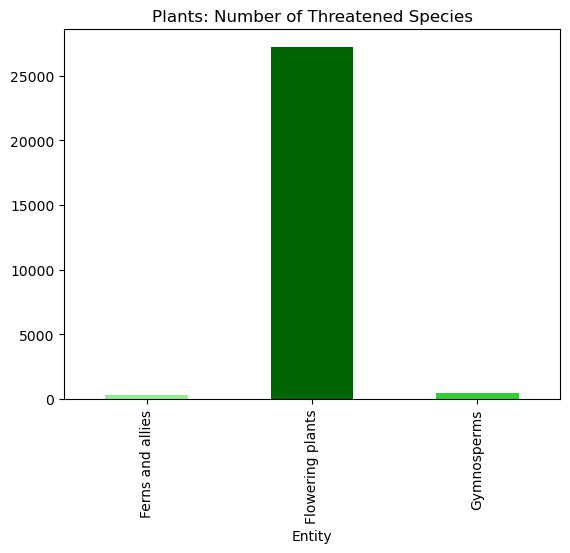

In [108]:
p = plants_df.plot(
    kind='bar',
    x='Entity',
    y='Number of threatened species',
    legend = False,
    title='Plants: Number of Threatened Species',
    color =['lightgreen','darkgreen','limegreen','purple','lightgreen','lightgreen']
)
p

In [110]:
# The terrestrial_df will print out the terrestrial animals
terrestrial_df = clean_df.drop([2,3,4,5,6,7,8])
terrestrial_df = terrestrial_df.reset_index(drop = True)

terrestrial_df

,Entity,Year,Number of threatened species
0,Amphibians,2024,2873
1,Birds,2024,1311
2,Mammals,2024,1354
3,Reptiles,2024,1845


In [112]:
# The aquatic_df will print out the aquatic and semi-aquatic creatures
aquatic_df = clean_df.drop([1,4,6,7,9])
aquatic_df = aquatic_df.reset_index(drop= True)

aquatic_df

,Entity,Year,Number of threatened species
0,Amphibians,2024,2873
1,Corals,2024,334
2,Crustaceans,2024,748
3,Fishes,2024,4017
4,Horseshoe Crabs,2024,2
5,Reptiles,2024,1845


In [114]:
# Created a combined dataframe that sums up the totals the threatened plant groups
plant_sum = sum(plants_df['Number of threatened species'])
plant_sum

27969

In [116]:
# Created a terrestrial dataframe that will print out the total populations of terrestrial creatures
terrestrial_sum = sum(terrestrial_df['Number of threatened species'])
terrestrial_sum

7383

In [118]:
# Created another combined dataframe that totals the threatened populations of aquatic animals
aquatic_sum = sum(aquatic_df['Number of threatened species'])
aquatic_sum

9819

In [120]:
# Made a new column names
column_names = ['Entity Type', 'Quantity']
# Created a dictionary with the total dataframes
data = {}
data['Entity Type'] = ['Aquatic', 'Terrestrial', 'Plants']
data['Quantity'] = [aquatic_sum, terrestrial_sum, plants_sum]
summary_df = pd.DataFrame(data, columns=column_names)
summary_df

,Entity Type,Quantity
0,Aquatic,9819
1,Terrestrial,7383
2,Plants,27969


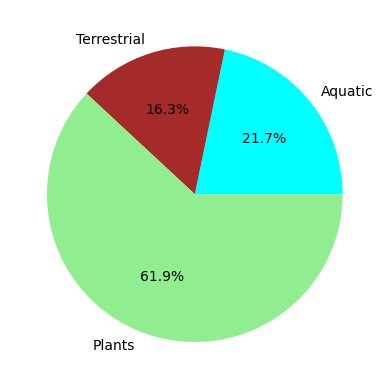

In [122]:
# Made a summary_df pie chart from matplot with the quantities converted to percentages. Also, customized the colors of the pie chart.
label_counts = summary_df['Quantity']
plt.pie(label_counts,
        labels = summary_df['Entity Type'],
        autopct = '%1.1f%%',
        colors = ['aqua', 'brown','lightgreen'],
       )
plt.show()

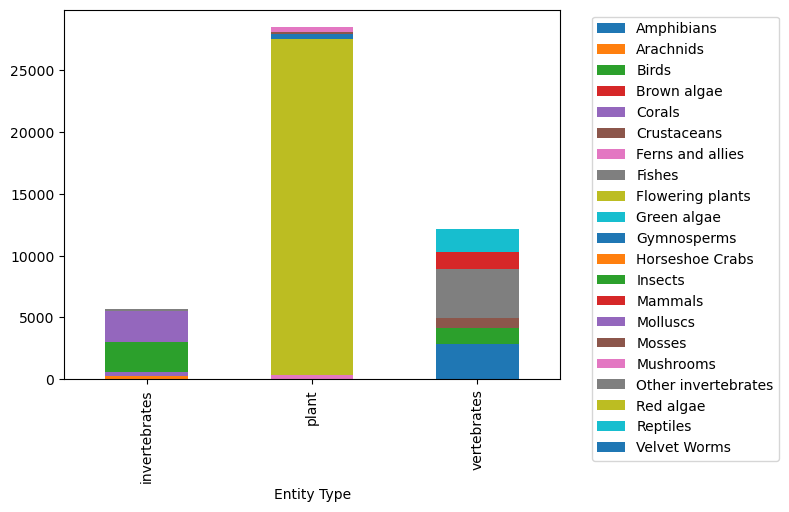

In [124]:
# Stacked bar chart using the pivot_df previously made
p = pivot_df.plot(kind='bar',
                  stacked=True,
                  legend=False)
plt.xlabel('Entity Type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')